In [0]:
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
DATA_DIR = '/content/drive/My Drive/Colab Notebooks/'
TRAIN_DATA_FILE = DATA_DIR + 'emnist-byclass-train.npz'
TEST_DATA_FILE = DATA_DIR + 'emnist-byclass-test.npz'

In [0]:
# Load training data
data = np.load(TRAIN_DATA_FILE)
train_labels = data['training_labels']
train_images = data['training_images']

In [0]:
trn_images = train_images.reshape((train_images.shape[0], 28 , 28))

In [0]:
trn_images = trn_images.astype('float32') / 255
trn_images = trn_images.reshape(-1, 28, 28, 1)
trn_labels = to_categorical(train_labels)

In [0]:
# Define Your Own Network
network = models.Sequential()
network.add(layers.Conv2D(filters=256, kernel_size=(5,5), padding = 'same', activation='relu',input_shape=(28, 28,1)))
network.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
network.add(layers.Conv2D(filters=128, kernel_size=(3,3) , padding = 'same', activation='relu'))
network.add(layers.MaxPooling2D(pool_size=(2,2)))

network.add(layers.Flatten())
network.add(layers.Dense(units=256, activation='relu'))
network.add(layers.Dropout(.5))
network.add(layers.Dense(units=62, activation='softmax'))

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = network.fit(trn_images, trn_labels, epochs=30, batch_size=512)

Epoch 1/30
1364/1364 [==============================] - 153s 112ms/step - loss: 1.0525 - accuracy: 0.6871
Epoch 2/30
1364/1364 [==============================] - 152s 112ms/step - loss: 0.7053 - accuracy: 0.7740
Epoch 3/30
1364/1364 [==============================] - 152s 112ms/step - loss: 0.6327 - accuracy: 0.7938
Epoch 4/30
1364/1364 [==============================] - 152s 112ms/step - loss: 0.5935 - accuracy: 0.8047
Epoch 5/30
1364/1364 [==============================] - 152s 111ms/step - loss: 0.5649 - accuracy: 0.8128
Epoch 6/30
1364/1364 [==============================] - 152s 111ms/step - loss: 0.5423 - accuracy: 0.8187
Epoch 7/30
1364/1364 [==============================] - 152s 111ms/step - loss: 0.5246 - accuracy: 0.8231
Epoch 8/30
1364/1364 [==============================] - 152s 111ms/step - loss: 0.5107 - accuracy: 0.8274
Epoch 9/30
1364/1364 [==============================] - 152s 111ms/step - loss: 0.4990 - accuracy: 0.8307
Epoch 10/30
1364/1364 [=======================

In [23]:
network.fit(trn_images, trn_labels, epochs=5, batch_size=512)

Epoch 1/5
1364/1364 [==============================] - 151s 111ms/step - loss: 0.4017 - accuracy: 0.8555
Epoch 2/5
1364/1364 [==============================] - 151s 111ms/step - loss: 0.3998 - accuracy: 0.8564
Epoch 3/5
1364/1364 [==============================] - 151s 110ms/step - loss: 0.3982 - accuracy: 0.8566
Epoch 4/5
1364/1364 [==============================] - 150s 110ms/step - loss: 0.3958 - accuracy: 0.8575
Epoch 5/5
1364/1364 [==============================] - 150s 110ms/step - loss: 0.3957 - accuracy: 0.8574


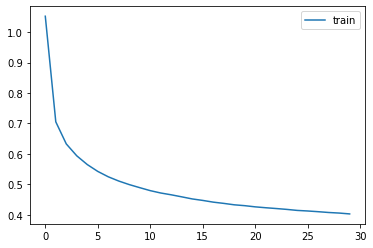

In [16]:
from matplotlib import pyplot
%matplotlib inline
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [0]:
# test data
test_images = np.load(TEST_DATA_FILE)['testing_images']

In [0]:
tst_images = test_images.reshape((test_images.shape[0], 28 , 28))

In [0]:
tst_images = tst_images.astype('float32') / 255
tst_images = tst_images.reshape(-1, 28, 28, 1)

In [24]:
results = network.predict_classes(tst_images)
results

array([ 1, 36,  0, ..., 55, 28, 24])

In [0]:
# Print results in CSV format and upload to Kaggle
with open('pred_results.csv', 'w') as f:
    f.write('Id,Category\n')
    for i in range(len(results)):
        f.write(str(i) + ',' + str(results[i]) + '\n')

In [0]:
from google.colab import files
files.download('pred_results.csv') 